In [1]:
# IMPORT LIBRARIES AND SETUP HANDCALCS
import numpy as np
import matplotlib.pyplot as plt
import handcalcs.render
from math import sqrt, pi

# Enable handcalcs rendering
%load_ext handcalcs.render

print("✅ Libraries loaded successfully!")
print("✅ Handcalcs enabled for professional calculation rendering")


✅ Libraries loaded successfully!
✅ Handcalcs enabled for professional calculation rendering


In [2]:
%%render
# Parameters
f_c_prime = 25  # Concrete compressive strength, MPa
f_y = 420       # Steel yield strength, MPa


<IPython.core.display.Latex object>

In [3]:
%%render
# Parameters
L = 8.0         # Beam span, m
b = 300         # Beam width, mm  
h = 600         # Beam height, mm
cover = 40      # Concrete cover, mm
d_bar = 20      # Assumed bar diameter, mm


<IPython.core.display.Latex object>

In [4]:
%%render
# Effective depth calculation
d = h - cover - d_bar/2  # Effective depth, mm


<IPython.core.display.Latex object>

In [5]:
%%render
# Parameters  
w_D = 12.0      # Dead load, kN/m
w_L = 18.0      # Live load, kN/m


<IPython.core.display.Latex object>

In [6]:
%%render
# Parameters
phi_flexure = 0.9    # Strength reduction factor for flexure
phi_shear = 0.75     # Strength reduction factor for shear
gamma_D = 1.2        # Load factor for dead load  
gamma_L = 1.6        # Load factor for live load


<IPython.core.display.Latex object>

In [7]:
%%render
# Factored load calculation per ACI 318-19 Section 5.3.1
w_u = gamma_D * w_D + gamma_L * w_L  # Factored distributed load, kN/m


<IPython.core.display.Latex object>

In [8]:
%%render
# Maximum moment for simply supported beam with uniform load
M_u = w_u * L**2 / 8  # Ultimate moment, kN⋅m


<IPython.core.display.Latex object>

In [9]:
%%render
# Maximum shear for simply supported beam with uniform load  
V_u = w_u * L / 2  # Ultimate shear, kN


<IPython.core.display.Latex object>

In [10]:
%%render
# β₁ factor per ACI 318-19 Section 22.2.2.4.3
beta_1 = 0.85  # For f'c ≤ 28 MPa


<IPython.core.display.Latex object>

In [11]:
%%render
# Concrete modulus of elasticity per ACI 318-19 Section 19.2.2.1(a)
E_c = 4700 * sqrt(f_c_prime)  # Concrete modulus, MPa


<IPython.core.display.Latex object>

In [12]:
%%render
# Minimum reinforcement per ACI 318-19 Section 9.6.1.2
A_s_min_1 = 0.25 * sqrt(f_c_prime) / f_y * b * d  # First criterion, mm²


<IPython.core.display.Latex object>

In [13]:
%%render
A_s_min_2 = 1.4 * b * d / f_y  # Second criterion, mm²


<IPython.core.display.Latex object>

In [14]:
%%render
# Controlling minimum reinforcement
A_s_min = max(A_s_min_1, A_s_min_2)  # Minimum steel area, mm²


<IPython.core.display.Latex object>

In [15]:
%%render
# Convert moment to N⋅mm for consistency
M_u_Nmm = M_u * 1e6  # Ultimate moment, N⋅mm


<IPython.core.display.Latex object>

In [16]:
%%render
# Approximate required steel area (assuming internal lever arm = 0.9d)
z = 0.9 * d  # Internal lever arm, mm
A_s_req_approx = M_u_Nmm / (phi_flexure * f_y * z)  # Required steel area, mm²


<IPython.core.display.Latex object>

In [17]:
%%render
# Final required steel area
A_s_required = max(A_s_req_approx, A_s_min)  # Required steel area, mm²


<IPython.core.display.Latex object>

In [18]:
%%render
# Reinforcement ratio
rho = A_s_required / (b * d)  # Reinforcement ratio


<IPython.core.display.Latex object>

In [19]:
%%render
# Maximum reinforcement ratio for tension-controlled section
rho_max = 0.025  # Maximum reinforcement ratio per ACI 318-19


<IPython.core.display.Latex object>

In [20]:
%%render
# Neutral axis depth
c = A_s_required * f_y / (0.85 * f_c_prime * b * beta_1)  # Neutral axis depth, mm


<IPython.core.display.Latex object>

In [21]:
%%render
# Equivalent rectangular stress block depth
a = beta_1 * c  # Stress block depth, mm


<IPython.core.display.Latex object>

In [22]:
%%render
# Nominal moment capacity
M_n = A_s_required * f_y * (d - a/2) / 1e6  # Nominal moment capacity, kN⋅m


<IPython.core.display.Latex object>

In [23]:
%%render
# Design moment capacity
phi_M_n = phi_flexure * M_n  # Design moment capacity, kN⋅m


<IPython.core.display.Latex object>

In [24]:
%%render
# Moment utilization ratio
moment_utilization = M_u / phi_M_n  # Moment utilization ratio


<IPython.core.display.Latex object>

In [25]:
%%render
# Concrete shear capacity per ACI 318-19 Section 22.5.5.1
V_c = 0.17 * sqrt(f_c_prime) * b * d / 1000  # Concrete shear capacity, kN


<IPython.core.display.Latex object>

In [26]:
%%render
# Design concrete shear capacity
phi_V_c = phi_shear * V_c  # Design concrete shear capacity, kN


<IPython.core.display.Latex object>

In [27]:
%%render
# Required steel shear capacity
V_s_required = max(0, V_u / phi_shear - V_c)  # Required steel shear capacity, kN


<IPython.core.display.Latex object>

In [28]:
%%render
# Shear utilization ratio
shear_utilization = V_u / phi_V_c  # Shear utilization ratio


<IPython.core.display.Latex object>

In [29]:
%%render
# Stirrup parameters (assuming 2-leg 10mm stirrups)
d_stirrup = 10  # Stirrup diameter, mm
A_v = 2 * pi * (d_stirrup/2)**2  # Area of 2-leg stirrups, mm²


<IPython.core.display.Latex object>

In [30]:
%%render
# Maximum stirrup spacing
s_max = min(d/2, 600)  # Maximum stirrup spacing, mm


<IPython.core.display.Latex object>

In [31]:
# Standard bar areas (mm²)
bar_areas = {
    10: 78.5,
    12: 113.1, 
    16: 201.1,
    20: 314.2,
    25: 490.9,
    32: 804.2
}

# Find suitable bar combination
print("REINFORCEMENT OPTIONS:")
print("=" * 40)

for diameter, area in bar_areas.items():
    for num_bars in range(2, 8):
        total_area = num_bars * area
        if 0.95 * A_s_required <= total_area <= 1.3 * A_s_required:
            ratio = total_area / A_s_required
            spacing = (b - 2*cover) / (num_bars - 1) if num_bars > 1 else 0
            print(f"{num_bars}Ø{diameter}: Area = {total_area:.0f} mm² (Ratio = {ratio:.2f}, Spacing = {spacing:.0f} mm)")

print("=" * 40)


REINFORCEMENT OPTIONS:
6Ø20: Area = 1885 mm² (Ratio = 1.02, Spacing = 44 mm)
7Ø20: Area = 2199 mm² (Ratio = 1.19, Spacing = 37 mm)
4Ø25: Area = 1964 mm² (Ratio = 1.06, Spacing = 73 mm)


In [32]:
print("DESIGN SUMMARY")
print("=" * 50)
print(f"Beam dimensions: {b} mm × {h} mm")
print(f"Effective depth: {d:.0f} mm")
print(f"Concrete strength: f'c = {f_c_prime} MPa")
print(f"Steel yield strength: fy = {f_y} MPa")
print()
print("LOADING:")
print(f"Dead load: {w_D} kN/m")
print(f"Live load: {w_L} kN/m") 
print(f"Factored load: {w_u:.1f} kN/m")
print()
print("CRITICAL FORCES:")
print(f"Ultimate moment: Mu = {M_u:.1f} kN⋅m")
print(f"Ultimate shear: Vu = {V_u:.1f} kN")
print()
print("FLEXURAL DESIGN:")
print(f"Required steel area: As = {A_s_required:.0f} mm²")
print(f"Reinforcement ratio: ρ = {rho:.4f}")
print(f"Design moment capacity: φMn = {phi_M_n:.1f} kN⋅m")
print(f"Moment utilization: {moment_utilization:.2f}")
print()
print("SHEAR DESIGN:")
print(f"Concrete shear capacity: φVc = {phi_V_c:.1f} kN")
print(f"Required steel shear: Vs = {V_s_required:.1f} kN")
print(f"Shear utilization: {shear_utilization:.2f}")
print()
print("DESIGN STATUS:")
if moment_utilization <= 1.0 and shear_utilization <= 1.0 and rho <= rho_max:
    print("✅ DESIGN IS ADEQUATE")
else:
    print("❌ DESIGN IS NOT ADEQUATE")
    if moment_utilization > 1.0:
        print("   - Moment capacity insufficient")
    if shear_utilization > 1.0:
        print("   - Shear capacity insufficient") 
    if rho > rho_max:
        print("   - Reinforcement ratio exceeds maximum")
print("=" * 50)


DESIGN SUMMARY
Beam dimensions: 300 mm × 600 mm
Effective depth: 550 mm
Concrete strength: f'c = 25 MPa
Steel yield strength: fy = 420 MPa

LOADING:
Dead load: 12.0 kN/m
Live load: 18.0 kN/m
Factored load: 43.2 kN/m

CRITICAL FORCES:
Ultimate moment: Mu = 345.6 kN⋅m
Ultimate shear: Vu = 172.8 kN

FLEXURAL DESIGN:
Required steel area: As = 1847 mm²
Reinforcement ratio: ρ = 0.0112
Design moment capacity: φMn = 341.5 kN⋅m
Moment utilization: 1.01

SHEAR DESIGN:
Concrete shear capacity: φVc = 105.2 kN
Required steel shear: Vs = 90.1 kN
Shear utilization: 1.64

DESIGN STATUS:
❌ DESIGN IS NOT ADEQUATE
   - Moment capacity insufficient
   - Shear capacity insufficient


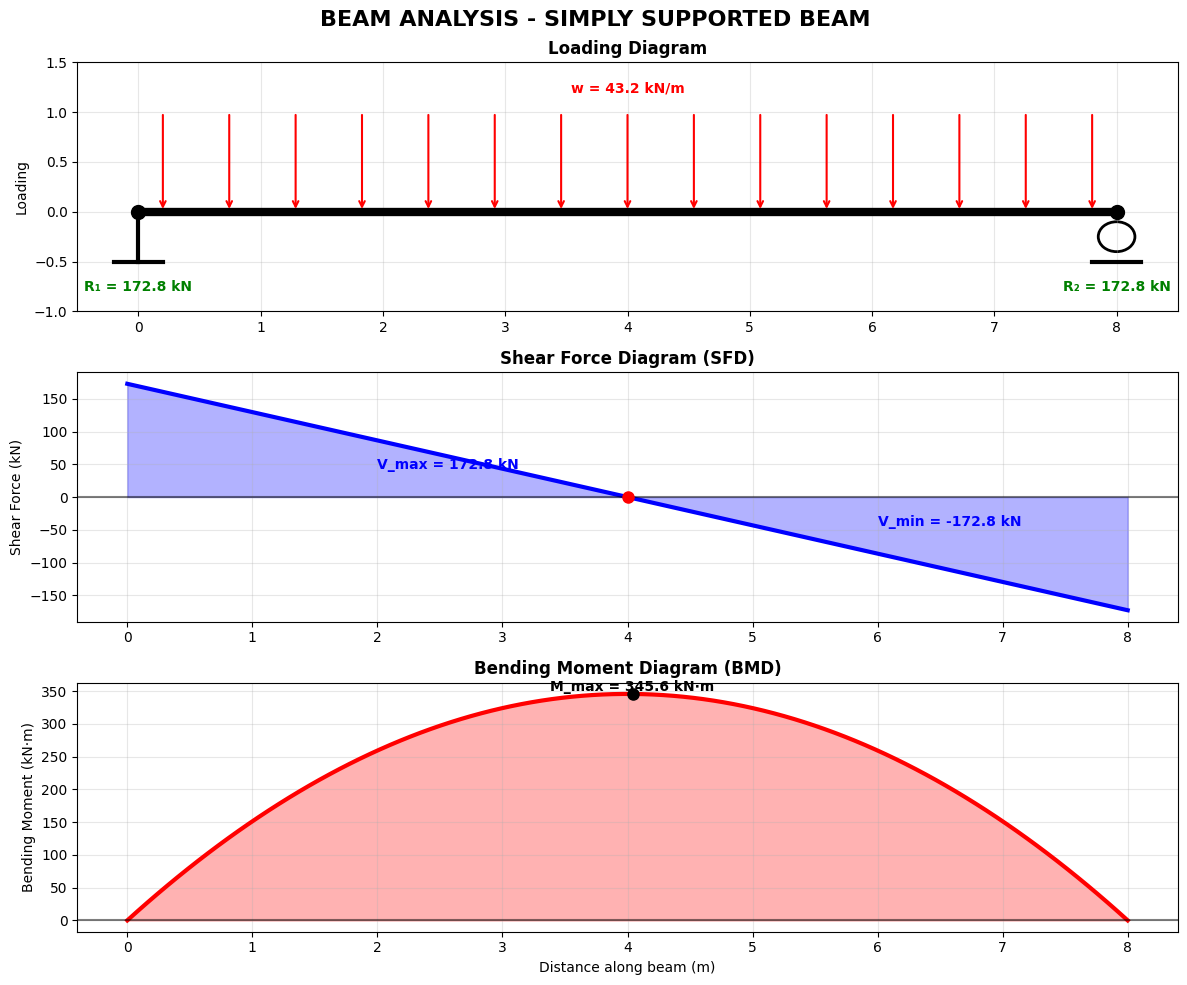

✅ Maximum moment: 345.6 kN⋅m at x = 4.0 m
✅ Maximum shear: 172.8 kN at supports


In [33]:
# Create beam analysis and diagrams
import matplotlib.patches as patches

# Generate points along beam
x = np.linspace(0, L, 100)

# Calculate shear force and bending moment
V = np.where(x <= L/2, w_u * (L/2 - x), -w_u * (x - L/2))
M = w_u * x * (L - x) / 2

# Create figure with subplots
fig, (ax1, ax2, ax3) = plt.subplots(3, 1, figsize=(12, 10))
fig.suptitle('BEAM ANALYSIS - SIMPLY SUPPORTED BEAM', fontsize=16, fontweight='bold')

# 1. Loading diagram
ax1.set_title('Loading Diagram', fontweight='bold')
ax1.plot([0, L], [0, 0], 'k-', linewidth=6, label='Beam')

# Draw supports
ax1.plot(0, 0, 'ko', markersize=10)  # Left support
ax1.plot([0, 0], [-0.5, 0], 'k-', linewidth=3)
ax1.plot([-0.2, 0.2], [-0.5, -0.5], 'k-', linewidth=3)

ax1.plot(L, 0, 'ko', markersize=10)  # Right support  
circle = plt.Circle((L, -0.25), 0.15, fill=False, linewidth=2)
ax1.add_patch(circle)
ax1.plot([L-0.2, L+0.2], [-0.5, -0.5], 'k-', linewidth=3)

# Distributed load arrows
x_load = np.linspace(0.2, L-0.2, 15)
for xi in x_load:
    ax1.annotate('', xy=(xi, 0), xytext=(xi, 1),
                arrowprops=dict(arrowstyle='->', lw=1.5, color='red'))

ax1.text(L/2, 1.2, f'w = {w_u:.1f} kN/m', ha='center', fontweight='bold', color='red')
ax1.text(0, -0.8, f'R₁ = {w_u*L/2:.1f} kN', ha='center', fontweight='bold', color='green')
ax1.text(L, -0.8, f'R₂ = {w_u*L/2:.1f} kN', ha='center', fontweight='bold', color='green')

ax1.set_xlim(-0.5, L+0.5)
ax1.set_ylim(-1, 1.5)
ax1.set_ylabel('Loading')
ax1.grid(True, alpha=0.3)

# 2. Shear force diagram
ax2.set_title('Shear Force Diagram (SFD)', fontweight='bold')
ax2.plot(x, V, 'b-', linewidth=3, label='Shear Force')
ax2.fill_between(x, V, alpha=0.3, color='blue')
ax2.axhline(y=0, color='k', linestyle='-', alpha=0.5)
ax2.plot(L/2, 0, 'ro', markersize=8)
ax2.text(L/4, V[25]/2, f'V_max = {max(V):.1f} kN', fontweight='bold', color='blue')
ax2.text(3*L/4, V[75]/2, f'V_min = {min(V):.1f} kN', fontweight='bold', color='blue')
ax2.set_ylabel('Shear Force (kN)')
ax2.grid(True, alpha=0.3)

# 3. Bending moment diagram
ax3.set_title('Bending Moment Diagram (BMD)', fontweight='bold')
ax3.plot(x, M, 'r-', linewidth=3, label='Bending Moment')
ax3.fill_between(x, M, alpha=0.3, color='red')
ax3.axhline(y=0, color='k', linestyle='-', alpha=0.5)
max_M_idx = np.argmax(M)
ax3.plot(x[max_M_idx], M[max_M_idx], 'ko', markersize=8)
ax3.text(x[max_M_idx], M[max_M_idx] + 5, f'M_max = {max(M):.1f} kN⋅m', 
         ha='center', fontweight='bold', color='black')
ax3.set_xlabel('Distance along beam (m)')
ax3.set_ylabel('Bending Moment (kN⋅m)')
ax3.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print(f"✅ Maximum moment: {max(M):.1f} kN⋅m at x = {L/2:.1f} m")
print(f"✅ Maximum shear: {max(abs(V)):.1f} kN at supports")


In [34]:
%%render
# Parameters - Alternative beam with point loads
L_2 = 6.0       # Beam span, m
P_1 = 50.0      # First point load, kN
P_2 = 75.0      # Second point load, kN  
a_1 = 2.0       # Position of P1 from left support, m
a_2 = 4.5       # Position of P2 from left support, m
w_D_2 = 8.0     # Distributed dead load, kN/m


<IPython.core.display.Latex object>

In [35]:
%%render
# Factored loads (assuming point loads are live loads)
P_1_u = gamma_L * P_1  # Factored point load 1, kN
P_2_u = gamma_L * P_2  # Factored point load 2, kN  
w_D_2_u = gamma_D * w_D_2  # Factored distributed load, kN/m


<IPython.core.display.Latex object>

In [36]:
%%render
# Support reactions for simply supported beam
R_A = (P_1_u * (L_2 - a_1) + P_2_u * (L_2 - a_2) + w_D_2_u * L_2**2 / 2) / L_2  # Left reaction, kN
R_B = P_1_u + P_2_u + w_D_2_u * L_2 - R_A  # Right reaction, kN


<IPython.core.display.Latex object>

In [37]:
%%render
# Maximum moment occurs under one of the point loads
# Check moment at P1 location
M_at_P1 = R_A * a_1 - w_D_2_u * a_1**2 / 2  # Moment at P1, kN⋅m

# Check moment at P2 location  
M_at_P2 = R_A * a_2 - P_1_u * (a_2 - a_1) - w_D_2_u * a_2**2 / 2  # Moment at P2, kN⋅m

# Maximum moment
M_u_2 = max(M_at_P1, M_at_P2)  # Maximum moment, kN⋅m


<IPython.core.display.Latex object>

In [38]:
%%render
# Maximum shear force
V_u_2 = max(abs(R_A), abs(R_B))  # Maximum shear, kN


<IPython.core.display.Latex object>

In [39]:
print("POINT LOAD EXAMPLE SUMMARY:")
print("=" * 40)
print(f"Beam span: {L_2} m")
print(f"Point loads: P1 = {P_1} kN at {a_1} m, P2 = {P_2} kN at {a_2} m")
print(f"Distributed load: {w_D_2} kN/m")
print()
print("FACTORED LOADS:")
print(f"P1,u = {P_1_u:.1f} kN, P2,u = {P_2_u:.1f} kN")
print(f"wu = {w_D_2_u:.1f} kN/m")
print()
print("REACTIONS:")
print(f"RA = {R_A:.1f} kN, RB = {R_B:.1f} kN")
print(f"Check: ΣV = {R_A + R_B:.1f} kN = {P_1_u + P_2_u + w_D_2_u * L_2:.1f} kN ✓")
print()
print("CRITICAL FORCES:")
print(f"Moment at P1: {M_at_P1:.1f} kN⋅m")
print(f"Moment at P2: {M_at_P2:.1f} kN⋅m")
print(f"Maximum moment: Mu = {M_u_2:.1f} kN⋅m")
print(f"Maximum shear: Vu = {V_u_2:.1f} kN")
print("=" * 40)


POINT LOAD EXAMPLE SUMMARY:
Beam span: 6.0 m
Point loads: P1 = 50.0 kN at 2.0 m, P2 = 75.0 kN at 4.5 m
Distributed load: 8.0 kN/m

FACTORED LOADS:
P1,u = 80.0 kN, P2,u = 120.0 kN
wu = 9.6 kN/m

REACTIONS:
RA = 112.1 kN, RB = 145.5 kN
Check: ΣV = 257.6 kN = 257.6 kN ✓

CRITICAL FORCES:
Moment at P1: 205.1 kN⋅m
Moment at P2: 207.4 kN⋅m
Maximum moment: Mu = 207.4 kN⋅m
Maximum shear: Vu = 145.5 kN
